# Problem Statement:
    1) Perform Sentiment analysis on Youtube's comments data
    2) Wordcloud of Positive and Negative comments
    3) Perform emoji analysis
    4) Additional Insights on additional data
        - Correlation
        - Video Category Analysis
        - Audiance engagement
        - Channels
        - Does title punctuations affect number of views

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing and understanding data
    This dataset contains comments in youtube. 
    We will perform sentiment analysis , Emoji analysis on this data

In [2]:
comments = pd.read_csv(r"E:\Projects\Youtube_project\UScomments.csv",error_bad_lines=False)
comments.shape

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


(691400, 4)

In [3]:
comments.head(7)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0

### Finding if there is any missing values in our dataset and if so, we remove that

In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
comments.dropna(inplace=True)      #remove null values

# Sentiment Analysis

In [6]:
from textblob import TextBlob

In [7]:
TextBlob('The end though 😭👍🏻❤️	').sentiment     #this will return 'polarity' as well as 'subjectivity' for sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [8]:
TextBlob("I've been following you from the start of your...	").sentiment.polarity      #only polarity of that sentiment

0.0

In [9]:
polarity=[]
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [10]:
comments['polarity']= polarity
comments.head(15)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000

### Separate positive and negative sentiments in different dataframe

In [11]:
positive_comments= comments[comments.polarity==1]

In [12]:
negative_comments = comments[comments.polarity==-1]

### creating wordcloud images for positive and negative sentiments

In [13]:
from wordcloud import WordCloud, STOPWORDS 

> NOTE- for creating a WordCloud, the input should be in string format (1D) like a single line, so let's join every negative comment.

In [14]:
negative = ' '.join(negative_comments.comment_text)  

negative[0:200]                      # showing first 200 characters

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?"

In [15]:
positive = ' '.join(positive_comments.comment_text)

positive[0:200]

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford"

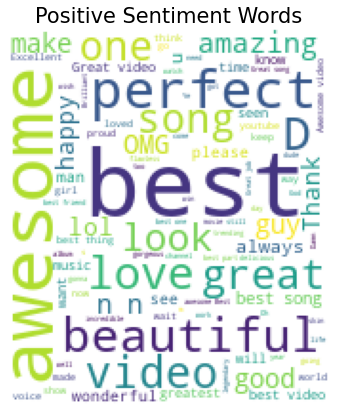

In [300]:
p_wordcloud= WordCloud(height=200, width=170, background_color='white', stopwords=set(STOPWORDS)).generate(positive)
plt.figure(figsize=(7,7))
plt.title("Positive Sentiment Words", size=21)
plt.axis('off')
plt.imshow(p_wordcloud)

(-0.5, 399.5, 199.5, -0.5)

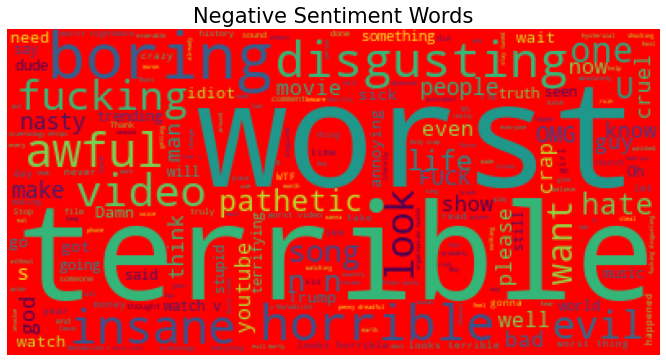

In [302]:
wordcloud= WordCloud(stopwords=set(STOPWORDS), background_color='red').generate(negative)
plt.figure(figsize=(15,6)) 
plt.imshow(wordcloud)
plt.title("Negative Sentiment Words", size=21)
plt.axis('off')

# Emoji Analysis

In [18]:
import emoji

In [19]:
emoji_list = [c for i in comments.comment_text for c in i if c in emoji.EMOJI_DATA] 

In [20]:
from collections import Counter                   

In [21]:
most_used_emoji=dict(Counter(emoji_list).most_common(10))
most_used_emoji

{'😂': 36987,
 '😍': 33453,
 '❤': 31119,
 '🔥': 8694,
 '😭': 8398,
 '👏': 5719,
 '😘': 5545,
 '👍': 5476,
 '💖': 5359,
 '💕': 5147}

In [22]:
emoji_10=[]
emoji_count=[]
for i in most_used_emoji:
    emoji_10.append(i)
    emoji_count.append(most_used_emoji[i])
emoji_10

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [23]:
import plotly.graph_objs as go

In [24]:
from plotly.offline import iplot

In [25]:
bar= go.Bar(x=emoji_10, y=emoji_count)
iplot([bar])

# Analyzing additional data:
    we have a folder containing comments data for various countries, let's analyze them
   

In [26]:
import os

In [27]:
path=r"E:\Projects\Youtube_project\additional_data"
files= os.listdir(path)

In [28]:
print("we have",len(files), "files as:", files) 

we have 10 files as: ['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'INvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'MXvideos.csv', 'RUvideos.csv', 'USvideos.csv']


> In file content we dont have country name , but we have it in file name, so lets add that in process

In [29]:
full_df=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]          # added another column for country name
    
    full_df=pd.concat([full_df,current_df])

In [30]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA

In [31]:
full_df.shape

(375942, 17)

## (1) Heatmap to find correlations in data

<AxesSubplot:>

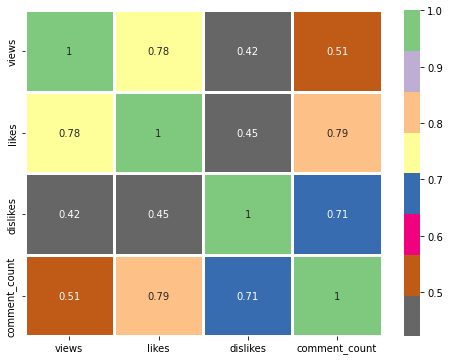

In [173]:
plt.figure(figsize=(8,6))
sns.heatmap(full_df[['views','likes','dislikes','comment_count']].corr(), annot=True, linewidths=3, cmap='Accent_r')

### Conclusion-
    1) Views & likes & Comment count are very related -> More likes and comments represent good view count
    2) dislikes and comment count are very related -> If a video is disliked, we can expect large number of comments on that video

## (2) Most Liked Category on Youtube

In [32]:
full_df.category_id.unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

### Getting category names data from another file

In [33]:
cat = pd.read_csv(r"E:\Projects\Youtube_project\category_file.txt", sep=':')
cat.head()

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals
17                         Sports

In [34]:
cat.reset_index(inplace=True)        # add another index without removing existing index (now converted to column)    

In [35]:
cat.columns=['category_id','category_name']

In [36]:
cat.set_index('category_id').head()

category_name
category_id                   
1             Film & Animation
2             Autos & Vehicles
10                       Music
15              Pets & Animals
17                      Sports

### Join category names to full_df on basis of category_id

In [37]:
full_df= full_df.merge(cat, on='category_id', how='left' )
full_df.head(5)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country   category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music  
1  STill got a lot of packages. Probably will las...      CA          Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy  
3  I know it's been a while since we did this sho...      CA   Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music

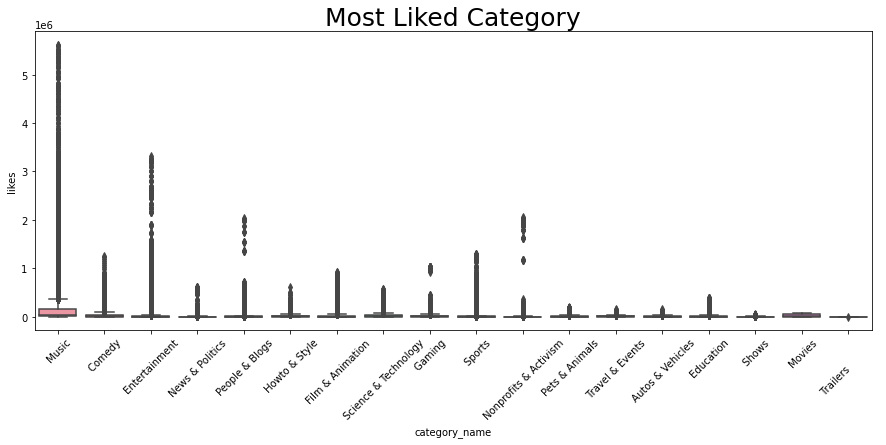

In [179]:
plt.figure(figsize=(15,5.5))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation=45)
plt.title('Most Liked Category', size=25)
plt.show()

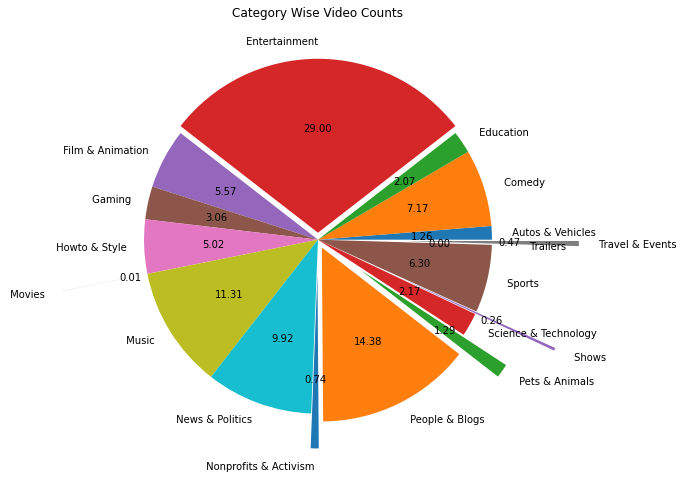

In [297]:
plt.figure(figsize=(12,8))
full_df.groupby('category_name')['video_id'].count().plot(kind='pie',explode=(0,0,0,0.04,0,0,0,0.5,0,0,0.2,0.05,0.3,0,0.5,0,0.1,0.5),autopct='%.2f', title='Category Wise Video Counts')
plt.ylabel('')
plt.show()

## (3) Analyze whether audiance is engaged or not?
    for this work, more features are required. Such as likes rate, dislike rate , comments rate for a perticular video
    Let's create them.

In [50]:
full_df['likes_rate'] = (full_df.likes/full_df.views)*100
full_df['dislike_rate'] = (full_df.dislikes/full_df.views)*100
full_df['comment_rate'] = (full_df.comment_count/full_df.views)*100

In [53]:
full_df.head(3)          # we can see , new features are added in this dataframe

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy   

  likes_rate  dislike_rate  comment_rate  
0   4.589104      0.253051      0.733639  
1  12.594873      0.166363      1.284185  
2   4.575843      0.167292      0.256342  

[3 rows x 21 columns]

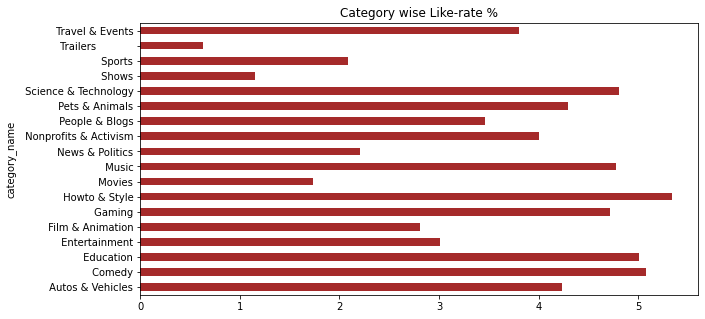

In [80]:
full_df.groupby('category_name')['likes_rate'].mean().plot(kind='barh', title=('Category wise Like-rate %'),color='brown',figsize=(10,5))
plt.show()

### Now lets make Grouped Bar Chart for audiance engagement or reactions
    for that we will have to create sesparate dataframe beacuse for projecting multiple bar graphs in one figure , it will be an issue of shape mismatch and reduce the chances of x factor mismatch

In [127]:
likes_per   =pd.DataFrame(full_df.groupby('category_name')['likes_rate'].mean())  
# dataframe created (overcome challenge of shape mismathch & hue mismathch)
dislikes_per =pd.DataFrame(full_df.groupby('category_name')['dislike_rate'].mean())
comments_per =pd.DataFrame(full_df.groupby('category_name')['comment_rate'].mean())

# merge all result into one dataframe
reactions = likes_per.merge(dislikes_per, on='category_name')
reactions = reactions.merge(comments_per, on='category_name')
reactions.reset_index(inplace=True)       
reactions.head(5)

category_name  likes_rate  dislike_rate  comment_rate
0   Autos & Vehicles    4.238582      0.208923      0.673257
1             Comedy    5.077151      0.249486      0.594066
2          Education    5.005766      0.177637      0.725831
3      Entertainment    3.010449      0.174640      0.494075
4   Film & Animation    2.805424      0.145287      0.447669

> Note - Here in this dataframe all derived columns mean have percentage value w.r.t. categories.. But they still have their parent dataframe column names. 

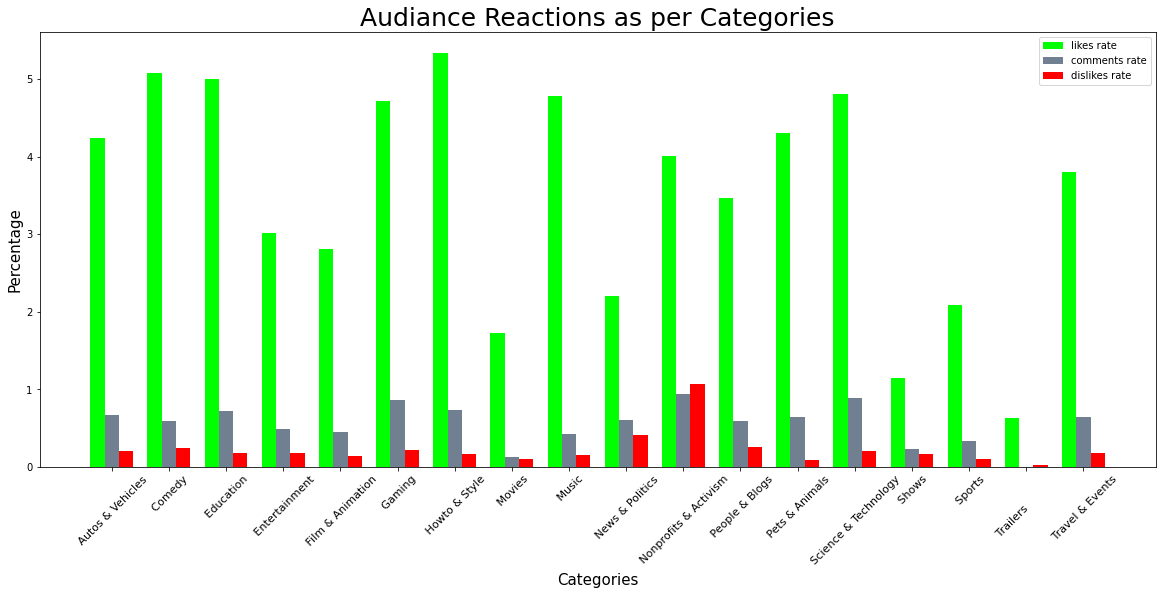

In [238]:
n=len(reactions.category_name)       # setting length of category column as number of places for plotting
place= np.arange(n)
width=0.25

plt.figure(figsize=(20,8))
bar1= plt.bar(place, reactions.likes_rate , width, color='lime')
bar2= plt.bar(place+width, reactions.comment_rate, width, color='slategray')
bar3= plt.bar(place+width*2, reactions.dislike_rate, width, color='r')

plt.xlabel('Categories', size=15)
plt.ylabel('Percentage' ,size=15)
plt.title('Audiance Reactions as per Categories', size=25)
plt.xticks(place+width, reactions.category_name ,rotation= 45, size=11)

plt.legend((bar1,bar2,bar3), ('likes rate','comments rate','dislikes rate'))
plt.show()

### Conclusion-
    1) News-Politics & Activism categories have higher dislike rate as compared to others
    2) We can see people dont usually prefer to comment or dislike , but give likes or just ignore it.
    3) People really appreciate work in - 1.Howto & Style, 2.Education, 3.Comedy, 4.Science & Tech, 5.Music
    4) Less appreciated categories are- 1.Movies , 2.Shows, 3.Sports, 4.News&Politics

## (4) Channels with most video counts

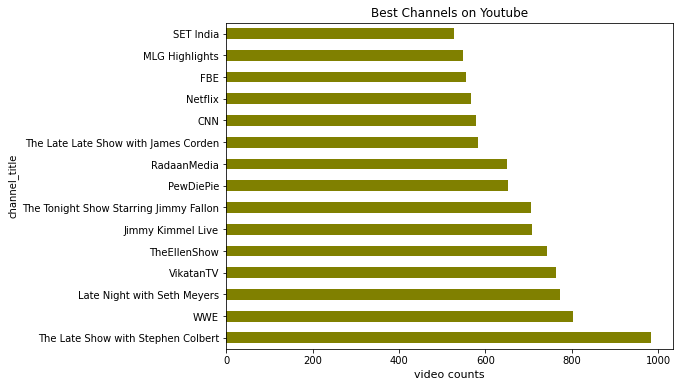

In [213]:
plt.figure(figsize=(8,6))
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).head(15).plot(kind='barh',title='Best Channels on Youtube', color='olive')
plt.xlabel('video counts', size=11)
plt.show()

## (5) Does title punctuations affect number of views

In [220]:
import string                # import string module for punctuation 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [227]:
def count_punc(x):                  #defining a function which counts punctuations in a text
    return len([c for c in x if c in string.punctuation])

In [228]:
full_df['punc_count'] = full_df['title'].apply(count_punc)         #apply the function on title column  

In [230]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   

                                         description  country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA         Music   
1  STill got a lot of packages. Probably will las...       CA        Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA        Comedy   

  likes_rate dislike_rate  comment_rate  punc_count  
0   4.589104     0.253051      0.733639           4  
1  12.594873     0.166363      1.284185           1  
2   4.575843     0.167292      0.256342           3  

[3 rows x 22 columns]

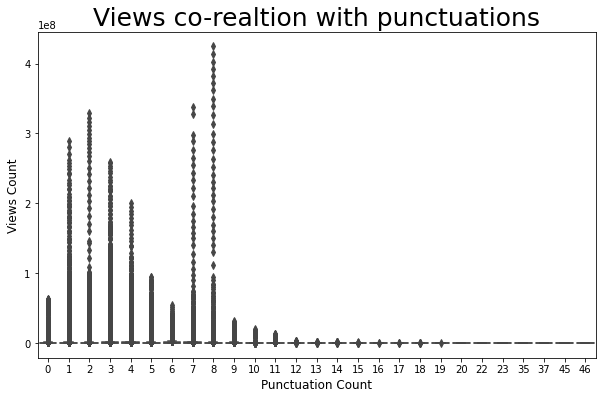

In [235]:
plt.figure(figsize=(10,6))
sns.boxplot(x='punc_count', y='views', data=full_df)
plt.title('Views co-realtion with punctuations', size=25)
plt.xlabel('Punctuation Count', size=12)
plt.ylabel('Views Count', size=12)
plt.show()

### Conclusion-
    It is better to keep less number of punctuations in video titles, but dont avoid them fully.